# 2019年度クラスター分析の実験資料$*$
## F1,2クラス（水曜7–10限）担当：亀井
## F3,4クラス（木曜7–10限）担当：THAWONMAS
#### $^*$本教材の内容に関する問合せは THAWONMAS(ruck@is.ritsumei.ac.jp) まで

## 氏名：LUO Yiming，学生番号：2600170541-4

当課題の参考資料と共に本資料におけるすべての内容を学習した後，CC402のPCの作業フォルダ（`C:\Users\各自アカウント名\Downloads`）または各自ののノートパソコンの作業フォルダにある，各セルの実行結果（各ミニ課題については正しい結果）が表示されている状態の本ファイルの最終版(拡張子.ipynbのファイル)をManaba+Rに提出せよ．

さて，以下の3つのCodeセルを必ず実行してから，学習を開始せよ．

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
import pandas as pd
from sklearn.decomposition import PCA

In [3]:
np.set_printoptions(precision=1, suppress=True) #有効桁1桁で丸める

最初に当課題の[データファイル](https://www.dropbox.com/s/stzyhfpkd35l92m/data_ca.csv?dl=0)（参考資料と同じ例）をダウンロードした後，[Pandas](https://ja.wikipedia.org/wiki/Pandas)の[pandas.read_csv関数](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)を使って，`C:\Users\各自アカウント名\Downloads`にダウンロードされたデータファイルを読み込む次のCodeセルを実行し，その結果を確認せよ．

In [4]:
df = pd.read_csv('data_ca.csv', index_col=0)
df

,Infection Rate,Media Coverage Rate
Country,,
A,6.6,35.8
B,8.4,22.1
C,24.2,19.1
D,10.0,34.4
E,14.5,9.9
F,12.2,31.1
G,4.8,53.0
H,19.8,7.5
I,6.1,53.4


## 1. 散布図のプロット

次にPandasの[plot.scatter関数](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html)を使ってデータの散布図をプロットする以下のCodeセルを実行し，その結果を確認せよ．(Pandasによるプロットについて調べたい場合は[DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot)が参考になる）

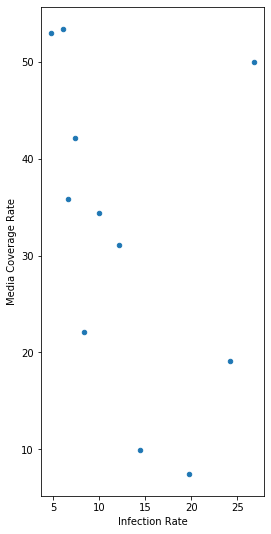

In [5]:
fig, ax = plt.subplots(figsize=(4,9)) # 横軸の距離及び縦軸の距離が視覚的に同じになるようにfigsize=(4,9)で図のサイズを決めている．数字はインチ．
df.plot.scatter(x='Infection Rate', y='Media Coverage Rate', ax=ax) # xとyは対象列名（変数名または特性名）
plt.show()

この例のようにデータ数$N~(N = 11)$がそんなにないときは各ポイントに個体名（ラベル）を追加する方が分析しやすい場合があるので，[matplotlib.pyplot.annotate関数](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate)を使った
```
fig, ax = plt.subplots(figsize=(4,9))
for i in range(len(df)):
    ax.annotate(df.iloc[i].name, df.iloc[i].values, 
    xytext=(5,-10), textcoords='offset points', size=12, color='dimgrey')
df.plot.scatter(x='Infection Rate', y='Media Coverage Rate', ax=ax)
plt.show()
```
を以下のCodeセルに記入し，同セルを実行せよ．　

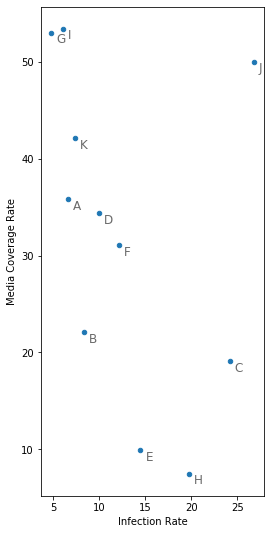

In [6]:
fig, ax = plt.subplots(figsize = (4,9))
for i in range(len(df)):
    ax.annotate(df.iloc[i].name, df.iloc[i].values,
               xytext = (5,-10), textcoords = 'offset points', size = 12, color ='dimgrey')
df.plot.scatter(x = 'Infection Rate', y = 'Media Coverage Rate', ax = ax)
plt.show()

### ミニ課題１

前記のコードにあるfigsize, xytext, size, colorのパラメータを数パターンで変更した内容を以下のCodeセルに記入し，実行せよ．Codeセルはパターン数（１Codeセル当たり１パターン）に応じて追加せよ．colorについては
[カラーリスト](https://matplotlib.org/examples/color/named_colors.html)をみよ．


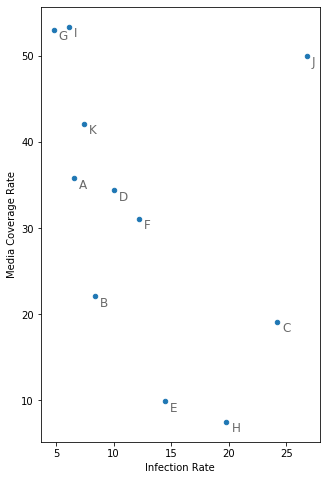

In [7]:
fig, ax = plt.subplots(figsize = (5,8)) #Changed figsize
for i in range(len(df)):
    ax.annotate(df.iloc[i].name, df.iloc[i].values,
               xytext=(5,-10), textcoords='offset points', size = 12, color='dimgrey')
df.plot.scatter(x='Infection Rate', y='Media Coverage Rate', ax=ax)
plt.show()

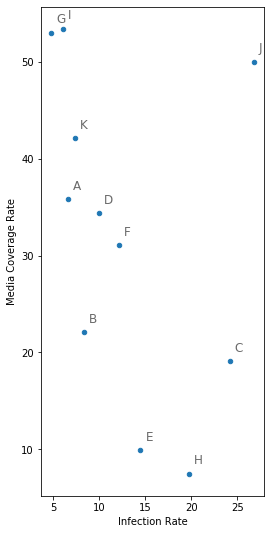

In [8]:
fig, ax = plt.subplots(figsize = (4,9))
for i in range(len(df)): #Changed xytext
    ax.annotate(df.iloc[i].name, df.iloc[i].values,
               xytext=(5, 10), textcoords='offset points', size = 12, color='dimgrey')
df.plot.scatter(x = 'Infection Rate', y = 'Media Coverage Rate', ax=ax)
plt.show()

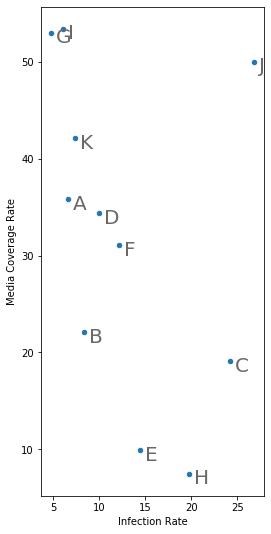

In [9]:
fig, ax = plt.subplots(figsize=(4,9))
for i in range(len(df)): #Changed textsize
    ax.annotate(df.iloc[i].name, df.iloc[i].values,
               xytext=(5,-10), textcoords='offset points', size = 20, color='dimgrey')
df.plot.scatter(x='Infection Rate', y='Media Coverage Rate', ax=ax)
plt.show()

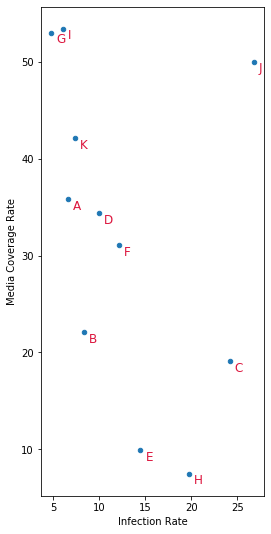

In [10]:
fig, ax = plt.subplots(figsize = (4,9))
for i in range(len(df)): #Changed textcolor
    ax.annotate(df.iloc[i].name, df.iloc[i].values,
               xytext = (5,-10), textcoords = 'offset points', size = 12, color = 'crimson')
df.plot.scatter(x = 'Infection Rate', y = 'Media Coverage Rate', ax = ax)
plt.show()

## 2. デンドログラムのプロット

次に，個体間の距離行列を表示するための以下のCodeセルを実行し，その結果を確認せよ．ここでは，数字が参考資料スライド12と同じように距離の二乗の値を示している．また，[scipy.spatial.distance](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)の[pdist関数](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html)と[squareform関数](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.squareform.html#scipy.spatial.distance.squareform)が使われている．

In [11]:
df2 = pd.DataFrame(squareform(pdist(df))**2, index=df.index, columns=df.index)
df2

Country,A,B,C,D,E,F,G,H,I,J,K
Country,,,,,,,,,,,
A,0.00,190.93,588.65,13.52,733.22,53.45,299.08,975.13,310.01,609.68,40.33
B,190.93,0.00,258.64,153.85,186.05,95.44,967.77,343.12,984.98,1116.97,401.00
C,588.65,258.64,0.00,435.73,178.73,288.00,1525.57,153.92,1504.10,961.57,811.24
D,13.52,153.85,435.73,0.00,620.50,15.73,373.00,819.65,376.21,525.60,66.05
E,733.22,186.05,178.73,620.50,0.00,454.73,1951.70,33.85,1962.81,1759.30,1087.25
F,53.45,95.44,288.00,15.73,454.73,0.00,534.37,614.72,534.50,570.37,144.04
G,299.08,967.77,1525.57,373.00,1951.70,534.37,0.00,2295.25,1.85,493.00,125.57
H,975.13,343.12,153.92,819.65,33.85,614.72,2295.25,0.00,2294.50,1855.25,1350.92
I,310.01,984.98,1504.10,376.21,1962.81,534.50,1.85,2294.50,0.00,440.05,129.38


この対称行列は各要素が対象個体（この例では国）間の特性空間における距離を示す．pdist関数で距離に関するパラメータが指定されていないため，デフォルトのユークリッド距離が使われている．

それでは，階層クラスター分析のための[scipy.cluster.hierarchy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)の
[linkage関数](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)の使用例を以下に見せる．
まず，手法と距離をそれぞれ「重心法」と「ユークリッド距離」を指定した以下のCodeセルを実行せよ．<br>
なお，手法（最短距離法「'single'」，最長距離法「'complete'」，群平均法「'average'」，メディアン法「'median'」，重心法「'centroid'」，ウォード法「'ward'」など）及び距離（ユークリッド距離「'euclidean'」，ユークリッド距離の2乗「'squared Euclidean distance'」，マハラノビスの距離「'mahalanobis'」，相関係数「'correlation'」など）のリストとその説明はそれぞれ[linkage関数](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)及び[scipy.spatial.distance.pdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist)をみよ．

In [12]:
Z = linkage(df,'centroid', 'euclidean')
print(Z)

[[ 6.   8.   1.4  2. ]
 [ 0.   3.   3.7  2. ]
 [ 5.  12.   5.6  3. ]
 [ 4.   7.   5.8  2. ]
 [10.  13.   8.6  4. ]
 [ 2.  14.  12.6  3. ]
 [ 1.  15.  13.8  5. ]
 [11.  17.  20.4  7. ]
 [ 9.  18.  21.9  8. ]
 [16.  19.  29.5 11. ]]


In [13]:
Z = linkage(df,'ward') #Tested using Ward Method
print(Z)

[[ 6.   8.   1.4  2. ]
 [ 0.   3.   3.7  2. ]
 [ 4.   7.   5.8  2. ]
 [ 5.  12.   6.5  3. ]
 [10.  14.  10.6  4. ]
 [ 2.  13.  14.5  3. ]
 [ 1.  15.  17.4  5. ]
 [ 9.  11.  24.9  3. ]
 [17.  18.  37.5  8. ]
 [16.  19.  61.7 11. ]]



階層クラスター分析では最初に各個体がそれぞれ１つのクラスタ（1個の個体からなるクラスタをシングルトンクラスタと呼ぶ）をなして
いるため，これらの$N$個のクラスタを段階的に統合していく．`Z`の形式として，`z[i,0], z[i,1]`が`i`番目に結合されるクラスタのindex（統合後は$N+i$番目のクラスタとなる），`z[i,2]`が統合前の距離，`z[i,3]`が統合後の個体数となる．以下は「⇒」の右辺に統合対象国とその統合後のindexを示す．
```
[[  6.    8.    1.4   2. ]  ⇒  G+I           11
 [  0.    3.    3.7   2. ]  ⇒　A+D           12
 [  5.   12.    5.6   3. ]  ⇒　F+AD          13
 [  4.    7.    5.8   2. ]  ⇒　E+H           14
 [ 10.   13.    8.6   4. ]  ⇒　K+FAD         15
 [  2.   14.   12.6   3. ]  ⇒　C+EH          16
 [  1.   15.   13.8   5. ]  ⇒　B+KFAD        17
 [ 11.   17.   20.4   7. ]  ⇒　GI+BKFAD      18
 [  9.   18.   21.9   8. ]  ⇒　J+GIBKFAD     19
 [ 16.   19.   29.5  11. ]] ⇒　CEH+JGIBKFAD  20
 ```

デンドログラムは次のCodeセルで記されているように [linkage関数](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)の結果である`Z`と[scipy.cluster.hierarchy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)の
[dendrogram関数](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)を用いて簡単にプロットできる．同セルを実行し，その結果を確認せよ．

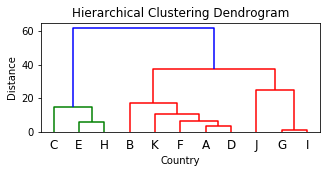

In [14]:
plt.figure(figsize=(5, 2))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
dendrogram(
    Z,
    labels=df.index.get_values(),
    leaf_font_size=12  # x軸のラベルのフォントサイズ
)
plt.show()

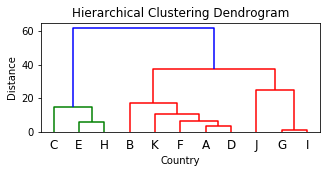

In [15]:
#Plot after using Ward Method
plt.figure(figsize=(5, 2))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
dendrogram(
    Z,
    labels=df.index.get_values(),
    leaf_font_size=12  # x軸のラベルのフォントサイズ
)
plt.show()

備考：<br>
１．デフォルト設定のとき，デンドログラムにおける青線の終端にあるクラスタはいずれも統合前の距離が最大値の7割以上である．<br>
２．実際の分析では実施する必要がないが，参考のために以下のCodeセルを実行すると，各クラスタが段階的に統合される様子が見える．ただし，同Codeセルに記されたコードの内容は当課題の学習範囲外であり，先述した青線が実装上非表示となっている．

Step :  0


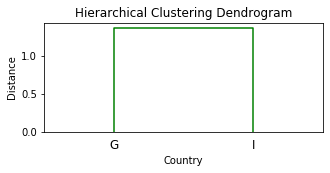

Step :  1


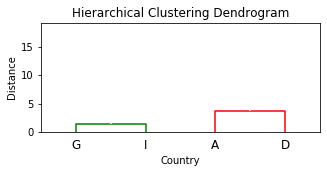

Step :  2


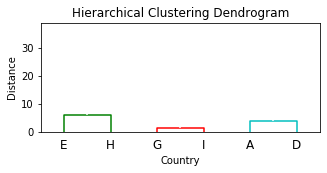

Step :  3


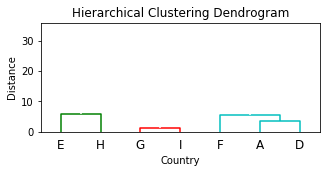

Step :  4


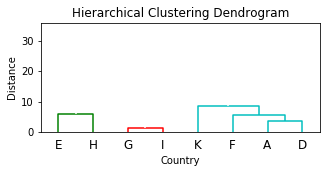

Step :  5


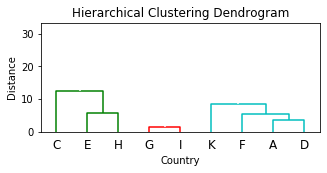

Step :  6


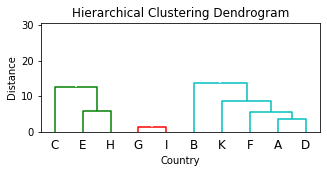

Step :  7


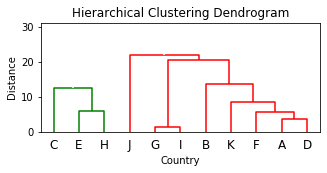

Step :  8


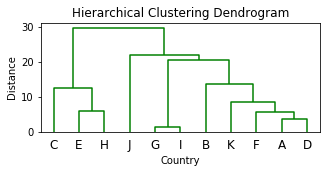

Step :  9


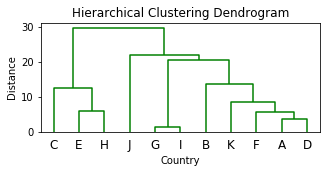

In [16]:
def step_by_step_dendogram(df, th):
    Z = linkage(df,'centroid', 'euclidean')
    plt.figure(figsize=(5, 2))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Country')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        color_threshold=th,
        above_threshold_color='w',
        labels=df.index.get_values(),
        leaf_font_size=12 
    )
    plt.show()


c_df = pd.DataFrame([], columns=df.columns)
for i in range(Z.shape[0]):
    ix = int(Z[i,0])
    if ix < len(df):
        c_df = pd.concat([c_df,df.iloc[ix:ix+1]])
    ix = int(Z[i,1])
    if ix < len(df):
        c_df = pd.concat([c_df,df.iloc[ix:ix+1]])
    threshold = Z[i,2]*1.01
    
    print("Step : ", i)
    step_by_step_dendogram(c_df, threshold)

次にデンドログラムを簡略化するための[dendrogram関数](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)の`truncate_mode`を紹介する．同モードが`lastp`のとき，最後に統合された`p`番目のクラスタ以外は省略したデンドログラムをプロットする．簡略化されたクラスタがシングルトンクラスタでない場合はラベルとして当該クラスタの個体数が「（　）」内に表示される．

以下に示すコード
```
plt.figure(figsize=(5, 2))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
dendrogram(
    Z,
    p=10, 
    truncate_mode='lastp',
    labels=df.index.get_values(),
    leaf_font_size=12  # font size for the x axis labels
)
plt.show()
```
を次のCodeセルに記入し，実行しその結果を確認せよ．

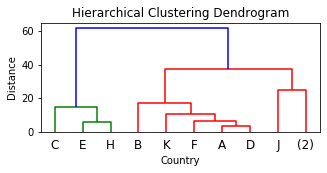

In [17]:
plt.figure(figsize=(5, 2))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
dendrogram(
    Z,
    p=10, 
    truncate_mode='lastp',
    labels=df.index.get_values(),
    leaf_font_size=12  # font size for the x axis labels
)
plt.show()

### ミニ課題2

前記のデータに対して，[linkage関数](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)
で用いられる手法及び距離，並びに`lastp`のときの[dendrogram関数](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)の`p`を数パターンで変更した内容を以下のCodeセルに記入し，`Z`の値をプリント，デンドログラムをプロットせよ．Codeセルはパターン数（１Codeセル当たり１パターン）に応じて追加せよ．

In [18]:
df.index.get_values()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
      dtype=object)

In [19]:
Z = linkage(df,'ward') #Tested using Ward Method
print(Z)

[[ 6.   8.   1.4  2. ]
 [ 0.   3.   3.7  2. ]
 [ 4.   7.   5.8  2. ]
 [ 5.  12.   6.5  3. ]
 [10.  14.  10.6  4. ]
 [ 2.  13.  14.5  3. ]
 [ 1.  15.  17.4  5. ]
 [ 9.  11.  24.9  3. ]
 [17.  18.  37.5  8. ]
 [16.  19.  61.7 11. ]]


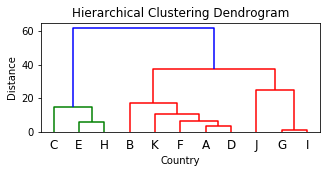

In [20]:
#Plot after using Ward Method
plt.figure(figsize=(5, 2))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
dendrogram(
    Z,
    labels=df.index.get_values(),
    leaf_font_size=12  # x軸のラベルのフォントサイズ
)
plt.show()

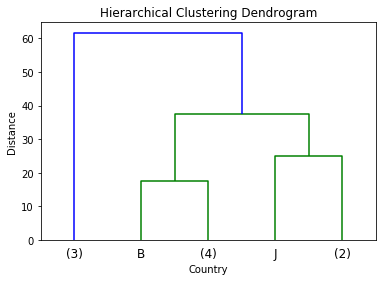

[[ 6.   8.   1.4  2. ]
 [ 0.   3.   3.7  2. ]
 [ 4.   7.   5.8  2. ]
 [ 5.  12.   6.5  3. ]
 [10.  14.  10.6  4. ]
 [ 2.  13.  14.5  3. ]
 [ 1.  15.  17.4  5. ]
 [ 9.  11.  24.9  3. ]
 [17.  18.  37.5  8. ]
 [16.  19.  61.7 11. ]]


In [21]:
plt.Figure(figsize=(5,2))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
dendrogram(Z, p = 5, truncate_mode='lastp', 
          labels = df.index.get_values(), leaf_font_size=12)
plt.show()
print(Z)

## 3. クラスタの抽出と可視化

ここでは，[linkage関数](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)の結果である`Z`及び[fcluster関数](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html)を用いてクラスタを抽出し，その後それらのクラスタを[plot.scatter関数](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html)でプロットする方法について述べる．最初の例として，同じクラスタ内のデータ同士の距離が`max_d`以下という条件でクラスタを抽出するやり方を以下のCodeセルで示す．同コードセルを実行せよ．

In [22]:
Z = linkage(df,'centroid', 'euclidean') #この例では，手法と距離をそれぞれ「重心法」と「ユークリッド距離」に指定
max_d = 10
clusters = fcluster(Z, max_d, criterion='distance')

print(clusters)

[4 5 2 4 1 4 3 1 3 6 4]


前記の各数字は当該個体（この例では国A,B,...,K）が所属するクラスタ番号を表している．

次に，fclusters関数の戻り値を代入されたclustersを用いて散布図における各クラスタを彩色して可視化する以下のCodeセルを実行し，その結果を確認せよ．

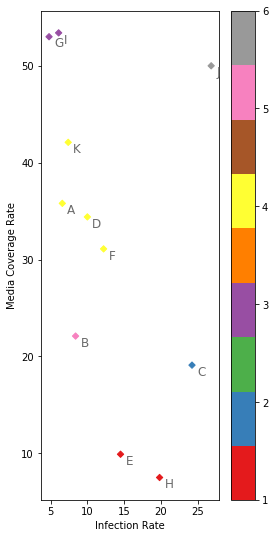

In [23]:
fig, ax = plt.subplots(figsize=(4,9))
for i in range(len(df)):
    ax.annotate(df.iloc[i].name, df.iloc[i].values, xytext=(5,-10), textcoords='offset points', size=12, color='dimgrey')
df.plot.scatter(x='Infection Rate', y='Media Coverage Rate', c=clusters, cmap='Set1', marker='D', ax=ax)
plt.show()

次に，クラスタ数`k`を指定した上でクラスタを抽出し可視化する例を以下のCodeセルで示す．同コードセルを実行し，その結果を確認せよ．

備考：`k`は参考資料の通りにはっきりとした基準がないが，ここでは<br>
1. デンドログラムの色（青線）
2. `Z[:,2]`の値（前後の行との差）
3. 散布図（個体間の距離，個体の密度など）

を検証した上で決める．

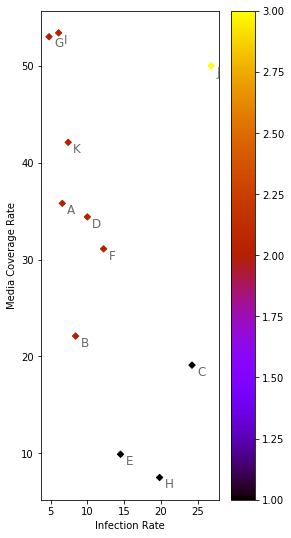

In [24]:
k = 3
clusters = fcluster(Z, k, criterion='maxclust')
fig, ax = plt.subplots(figsize=(4,9))
for i in range(len(df)):
    ax.annotate(df.iloc[i].name, df.iloc[i].values, xytext=(5,-10), textcoords='offset points', size=12, color='dimgrey')
df.plot.scatter(x='Infection Rate', y='Media Coverage Rate', c=clusters, cmap='gnuplot', marker='D', ax=ax)
plt.show()

### ミニ課題3

前記の2つのCodeセルに対して`max_d`（または`k`）及びカラーバー（cmap）を数パターンで変更した内容を以下のCodeセルに記入し，実行せよ．Codeセルはパターン数（１Codeセル当たり１パターン）に応じて追加せよ．カラーバーは [カラーバーのリスト](https://matplotlib.org/examples/color/colormaps_reference.html)を参考にし，分かりやすいクラスタの彩色を試みよ．

In [25]:
Z = linkage(df,'centroid', 'euclidean') #この例では，手法と距離をそれぞれ「重心法」と「ユークリッド距離」に指定
max_d = 15 #Changed max_d
clusters = fcluster(Z, max_d, criterion='distance')

print(clusters)

[3 3 1 3 1 3 2 1 2 4 3]


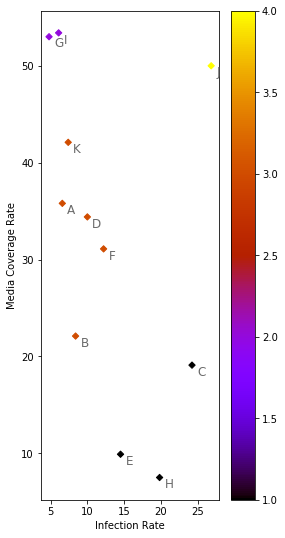

In [26]:
k = 4 #changed k
clusters = fcluster(Z, k, criterion='maxclust')
fig, ax = plt.subplots(figsize=(4,9))
for i in range(len(df)):
    ax.annotate(df.iloc[i].name, df.iloc[i].values, xytext=(5,-10), textcoords='offset points', size=12, color='dimgrey')
df.plot.scatter(x='Infection Rate', y='Media Coverage Rate', c=clusters, cmap='gnuplot', marker='D', ax=ax)
plt.show()

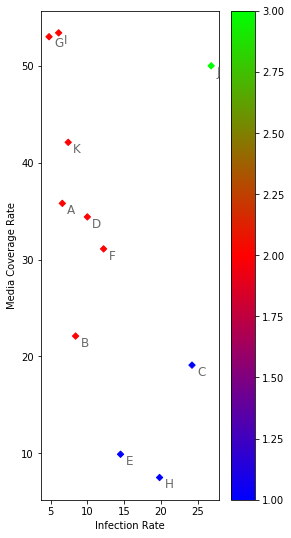

In [27]:
k = 3 #changed cmap
clusters = fcluster(Z, k, criterion='maxclust')
fig, ax = plt.subplots(figsize=(4,9))
for i in range(len(df)):
    ax.annotate(df.iloc[i].name, df.iloc[i].values, xytext=(5,-10), textcoords='offset points', size=12, color='dimgrey')
df.plot.scatter(x='Infection Rate', y='Media Coverage Rate', c=clusters, cmap='brg', marker='D', ax=ax)
plt.show()

## 4. 3個以上の特性をもつデータの分析

ここで，3個以上の特性をもつデータの分析について述べる．まず，例として，$10$個の特性（変数）で構成される$150$個体をもつ[データファイル](https://www.dropbox.com/s/q6t23yex16d4623/data_ca2.csv?dl=0)をダウンロードしてから，以下のCodeセルを実行せよ．

In [28]:
df = pd.read_csv('data_ca2.csv', index_col=0)
df.head()

,A,B,C,D,E,F,G,H,I,J
Data #,,,,,,,,,,
0,0.115472,0.256723,0.532708,0.545076,0.047789,0.067300,0.349178,0.049986,0.771902,0.777769
1,0.694639,0.580393,0.620746,0.700461,0.074113,0.595328,0.140404,0.982516,0.504288,0.707056
2,0.478354,0.109456,0.489148,0.446214,0.933503,0.333906,0.275180,0.488246,0.359749,0.805523
3,0.752145,0.204653,0.554463,0.585653,0.063096,0.533122,0.288110,0.972307,0.794904,0.486665
4,0.510801,0.458781,0.406344,0.781883,0.939147,0.244200,0.103826,0.573786,0.365659,0.473406


これらの個体の散布図をある2つの特性でプロットするとクラスタがはっきりと見えるが，とりあえず以下のCodeセルを実行せよ．

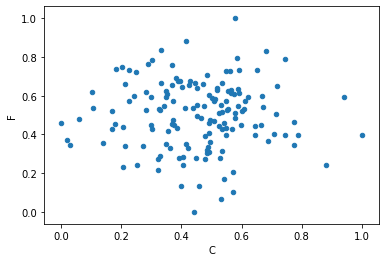

In [29]:
fig, ax = plt.subplots()

df.plot.scatter(x='C', y='F', ax=ax)
plt.show()

### ミニ課題4

前記のデータに対して数パターンの特性の組み合わせを用いて散布図をプロットせよ．Codeセルはパターン数（１Codeセル当たり１パターン）に応じて追加せよ．

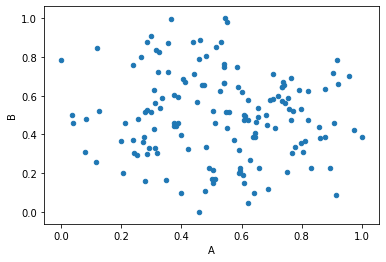

In [30]:
fig, ax = plt.subplots()
df.plot.scatter(x = 'A', y = 'B', ax = ax)
plt.show()

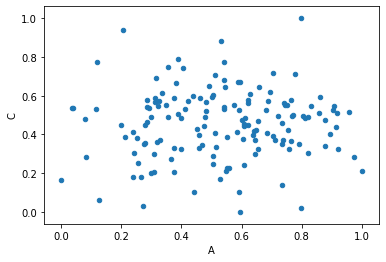

In [31]:
fig, ax = plt.subplots()
df.plot.scatter(x = 'A', y = 'C', ax = ax)
plt.show()

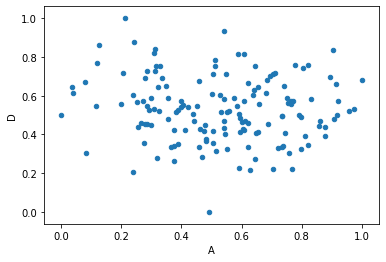

In [32]:
fig, ax = plt.subplots()
df.plot.scatter(x = 'A', y = 'D', ax = ax)
plt.show()

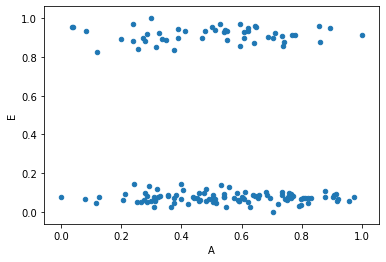

In [33]:
fig, ax = plt.subplots()
df.plot.scatter(x = 'A', y = 'E', ax = ax)
plt.show()

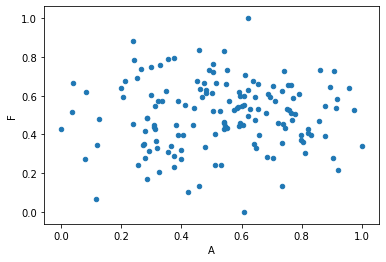

In [34]:
fig, ax = plt.subplots()
df.plot.scatter(x = 'A', y = 'F', ax = ax)
plt.show()

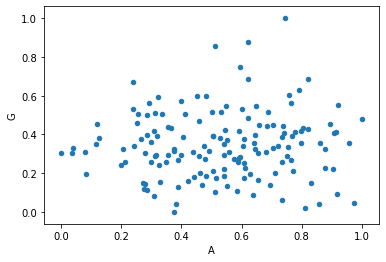

In [35]:
fig, ax = plt.subplots()
df.plot.scatter(x = 'A', y = 'G', ax = ax)
plt.show()

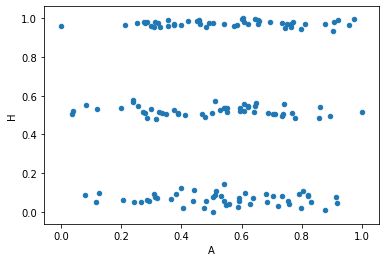

In [36]:
fig, ax = plt.subplots()
df.plot.scatter(x = 'A', y = 'H', ax = ax)
plt.show()

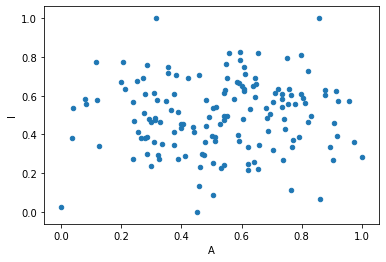

In [37]:
fig, ax = plt.subplots()
df.plot.scatter(x = 'A', y = 'I', ax = ax)
plt.show()

### Using Seaborn to draw all the Patterns' relativity

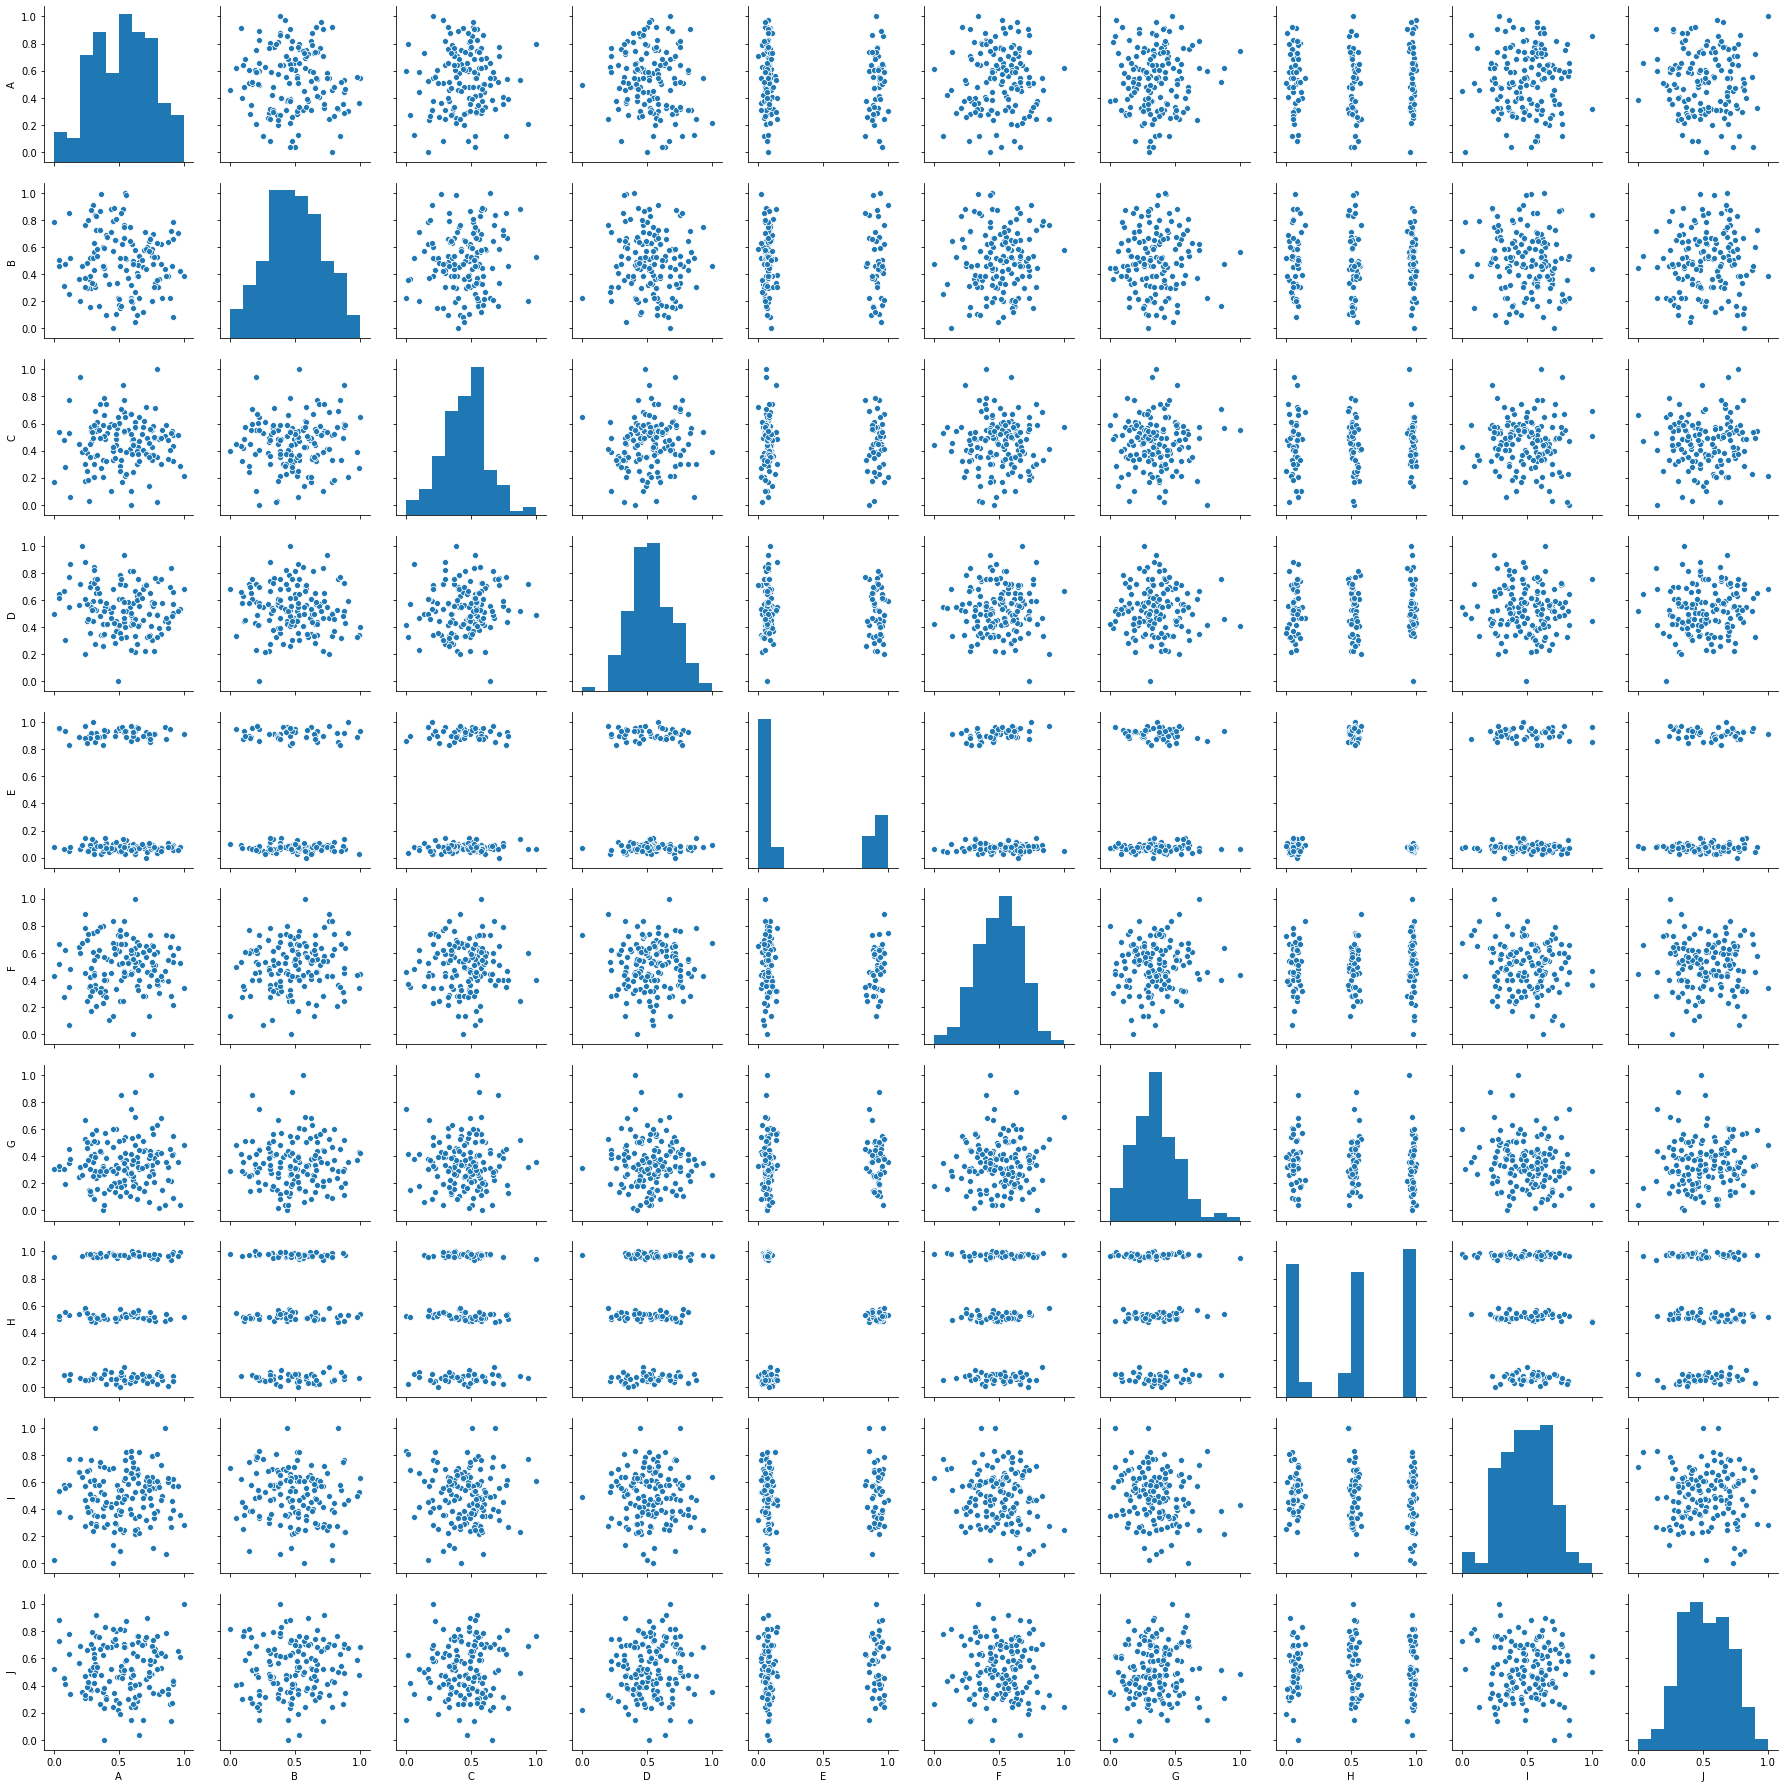

In [38]:
import seaborn as sns
relative_pic = sns.pairplot(df, vars = ['A','B','C','D','E','F','G','H','I','J'])
plt.show()

### 4.1 主成分1と2空間の散布図のプロット

多特性をもつ未知データの場合，どの特性を組み合わせて散布図をプロットすれば分かりやすい結果が得られるかは事前にわからない．本テーマでは，このようなデータの散布図をプロットするとき，次のCodeセルで実装されているように，第1と2の主成分がなす空間で行うこととする．主成分分析に[sklearn.decomposition](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)の[PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)を用いている，同Codeセルを実行し，その結果を確認せよ．

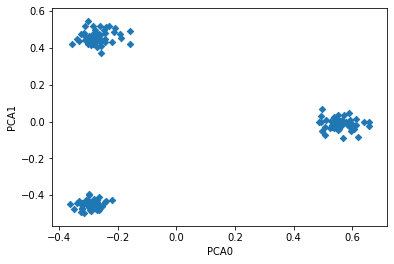

In [39]:
pca = PCA(2)
pca.fit(df)
df_pca = pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(2)], index=df.index)

fig, ax = plt.subplots()
df_pca.plot.scatter(x='PCA0', y='PCA1', marker='D', ax=ax)
plt.show()

備考：<br>
1. この例では主成分1(PCA0)と2(PCA1)空間にクラスタがはっきりとみえるが，他のデータについてはそうなるとは限らない．<br>
2. 主成分はデータと異なるデータフレームに格納されていることに注意せよ．（データはdf，主成分はdf_pca）

### 4.2 デンドログラムのプロット及びクラスタの抽出と可視化

前記の散布図から，3つのクラスタが存在すると推測できる．この推測結果を元に以下の2つのCodeセルでそれぞれデンドログラムのプロット及びクラスタの抽出と可視化を行う．それぞれのCodeセルを実行しその結果を確認せよ．

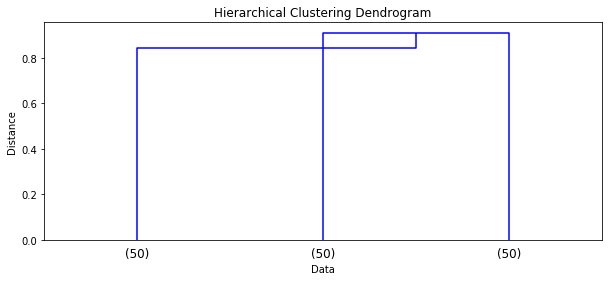

In [40]:
Z = linkage(df,'centroid', 'euclidean')

plt.figure(figsize=(10, 4))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data')
plt.ylabel('Distance')
dendrogram(
    Z,
    p=3,
    truncate_mode='lastp',
    labels=df.index.get_values(),
    leaf_font_size=12 
)
plt.show()

[2 3 1 3 1 2 1 2 3 1 2 3 3 1 3 2 1 3 2 2 2 3 2 1 3 1 1 3 1 2 3 1 2 2 1 3 1
 3 3 2 3 1 2 1 2 1 2 1 3 3 3 1 1 2 1 1 3 2 1 2 3 3 2 2 1 2 3 2 1 3 1 3 3 1
 1 3 1 1 2 2 2 3 3 3 2 2 3 1 3 3 2 3 3 1 1 1 2 1 1 1 2 1 2 3 1 2 3 2 1 2 2
 2 2 2 3 1 2 3 3 1 3 1 3 2 1 3 2 3 3 3 2 1 1 3 1 2 3 2 3 1 2 1 1 3 3 2 2 2
 2 1]


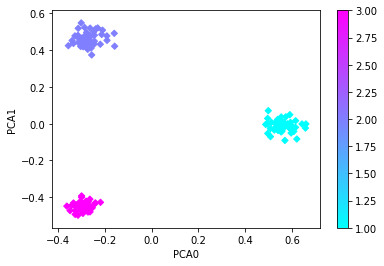

In [41]:
fig, ax = plt.subplots()
k = 3 
clusters = fcluster(Z, k, criterion='maxclust')
print(clusters)

df_pca.plot.scatter(x='PCA0', y='PCA1', c=clusters, cmap='cool', marker='D', ax=ax)
plt.show()

## 以上